In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
def set_style():
    # Set the color map
    colors = plt.get_cmap('plasma')
    
    # Set the DPI for the plots
    plt.rcParams['figure.dpi'] = 300
    
    # Set font sizes for various elements
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['font.size'] = 16
    
    return colors

colors = set_style()

## suplot merge deleted mitakenly

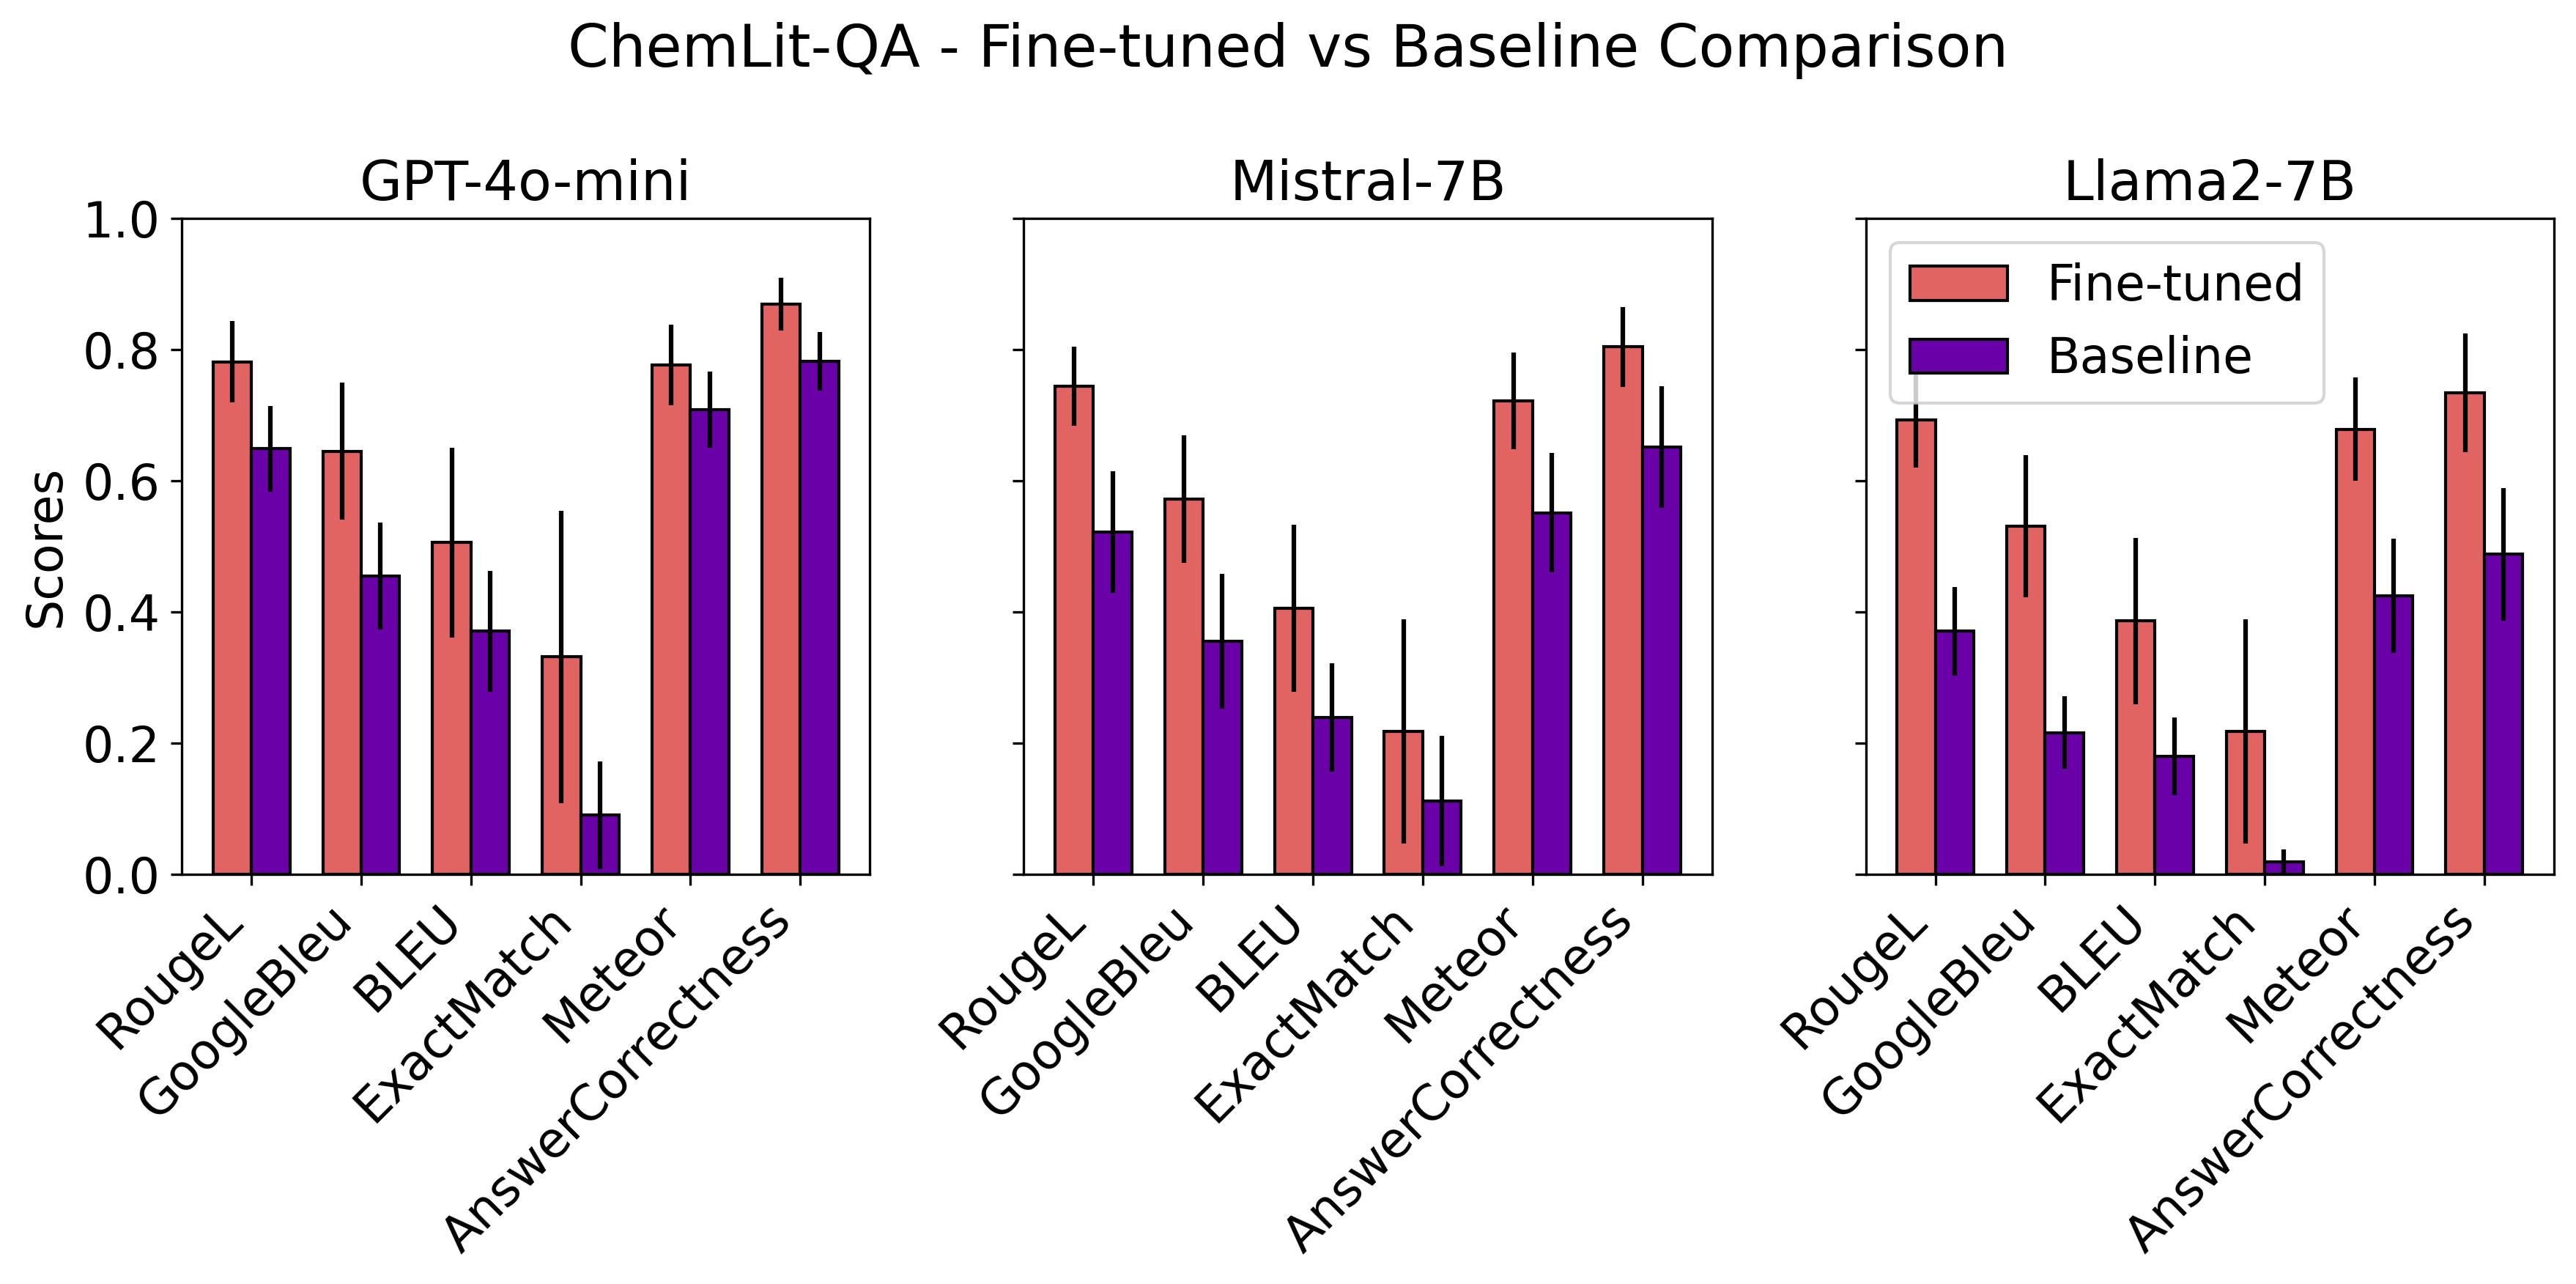

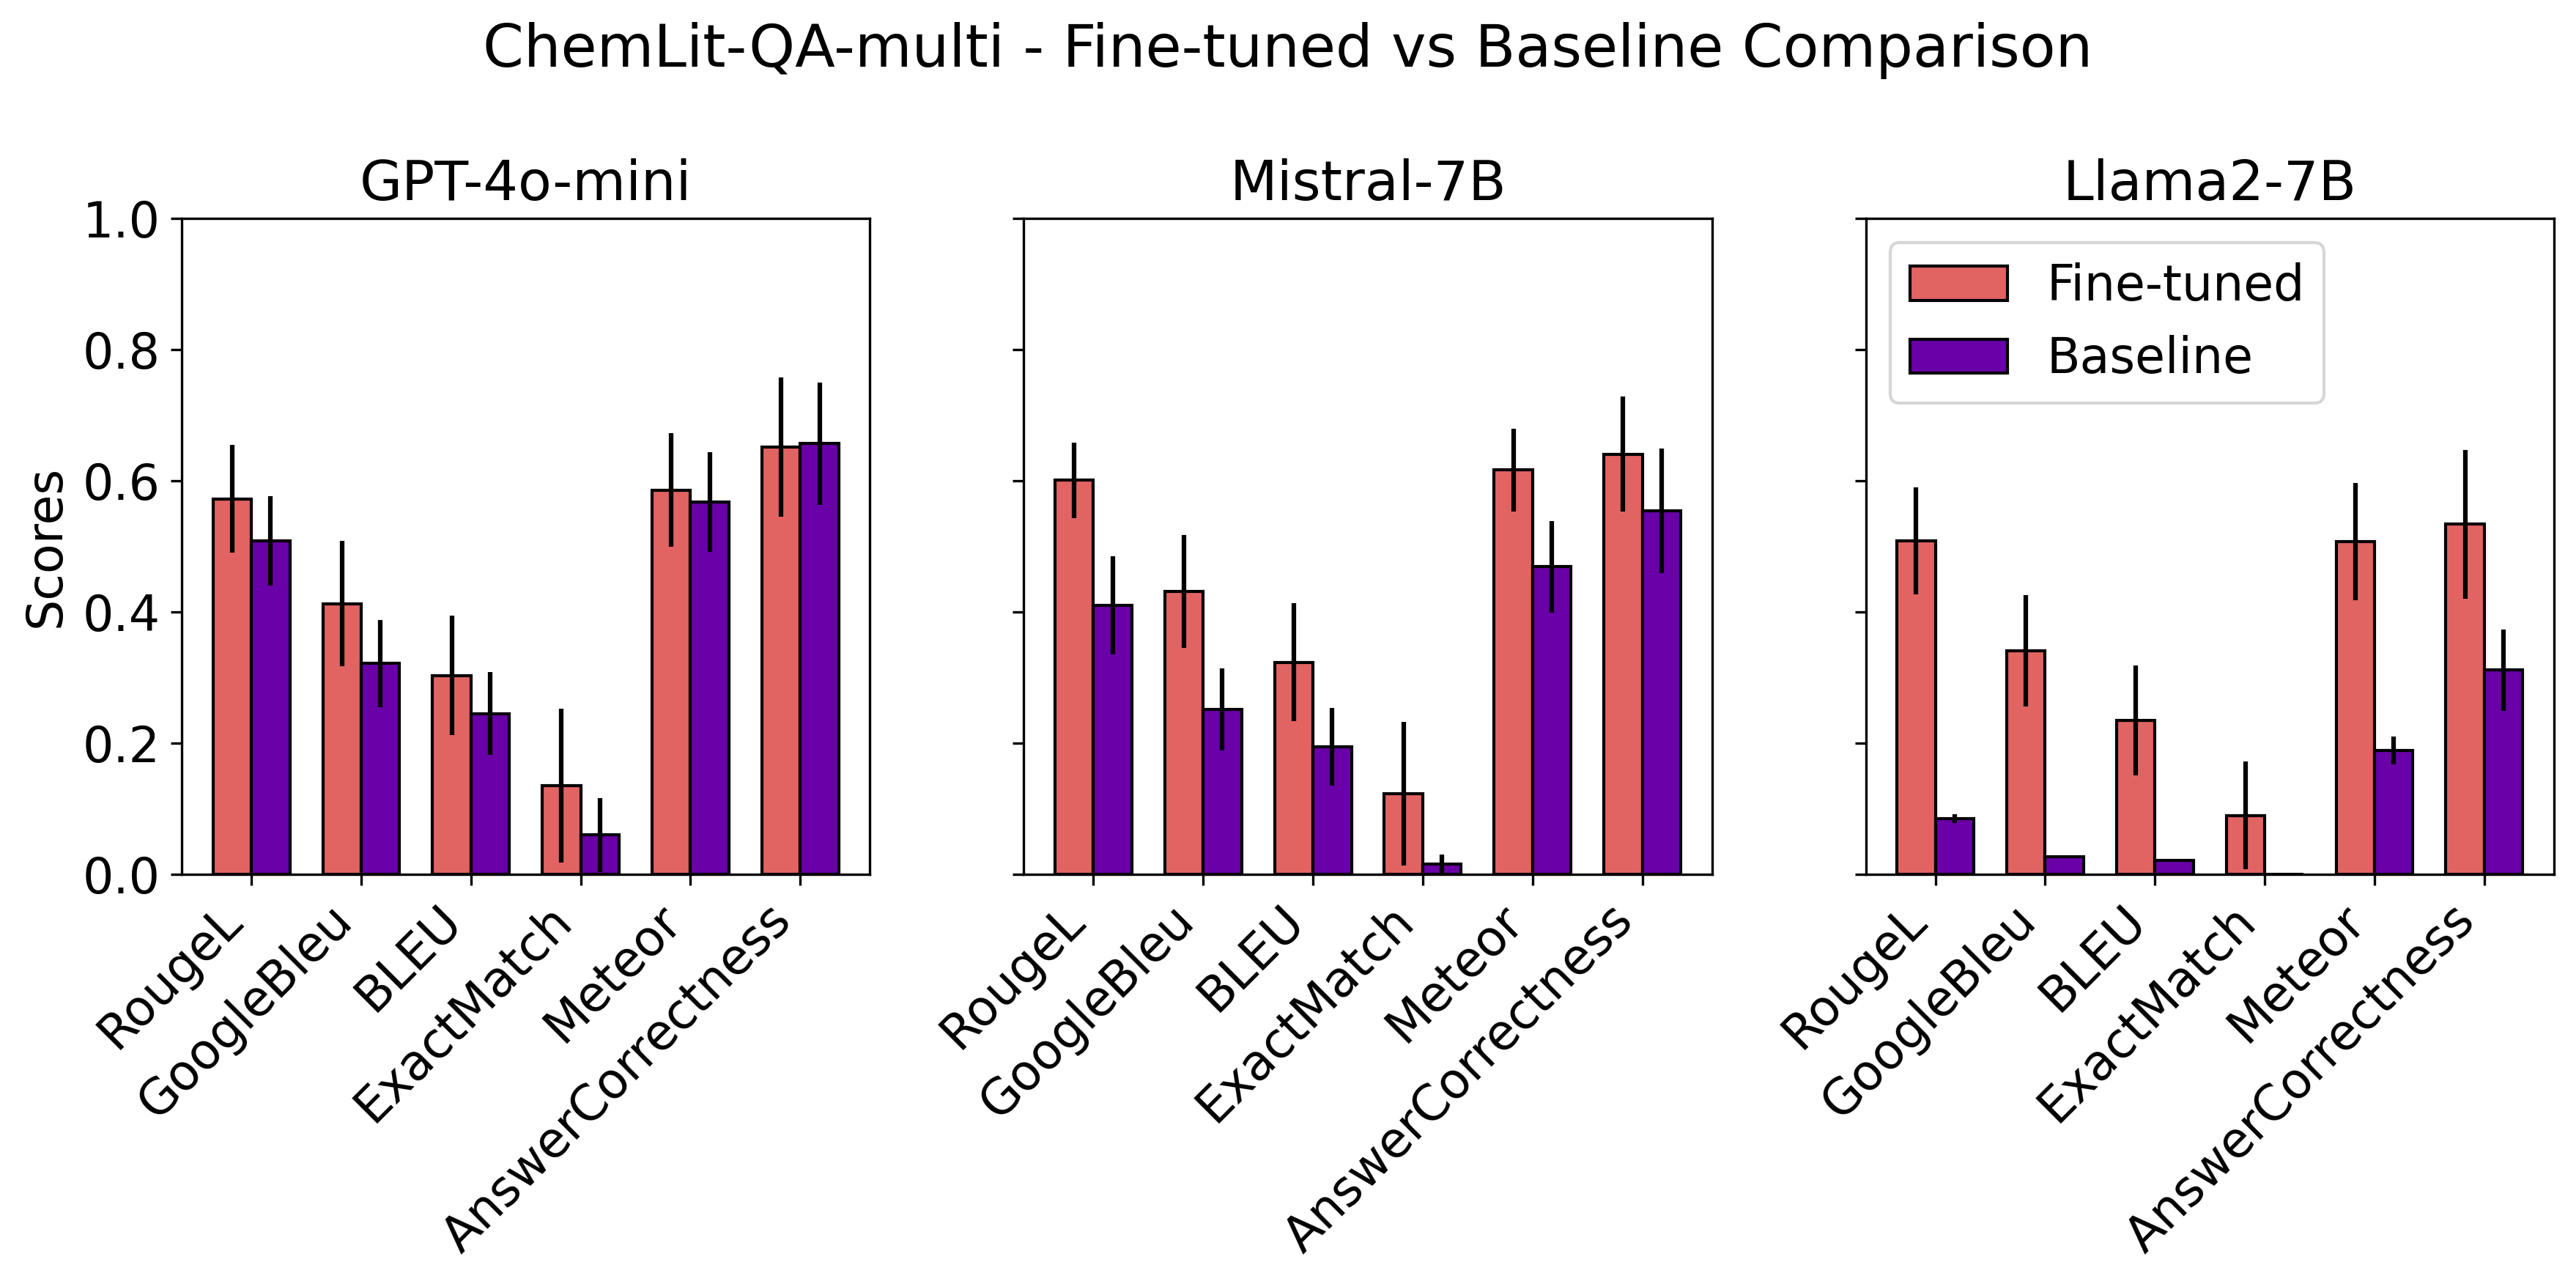

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Metrics: ['RougeL', 'GoogleBleu', 'BLEU', 'ExactMatch', 'Meteor', 'AnswerCorrectness']
metrics = ['RougeL', 'GoogleBleu', 'BLEU', 'ExactMatch', 'Meteor', 'AnswerCorrectness']
llms = ["GPT-4o-mini", "Mistral", "Llama2-7B"]
results = {"ChemLit-QA": [f"{llm}_eval.csv" for llm in llms],
           "ChemLit-QA-multi": [f"multihop_{llm}_eval.csv" for llm in llms]}
# Create list ft_metrics by prepending 'FT_' to Metrics
ft_metrics = ['FT_' + metric for metric in metrics]

# Create list nft_metrics by prepending 'NFT_' to Metrics
nft_metrics = ['NFT_' + metric for metric in metrics]

# Iterate through all .csv files under the same directory
for dataset, file_list in results.items():
    fig, axs = plt.subplots(1,3 ,figsize=(12, 6), sharey=True)
    axs = axs.flatten()


    for file in file_list:
        df = pd.read_csv(file)
        ft_data = df[ft_metrics]
        nft_data = df[nft_metrics]
        
        ft_mean = ft_data.mean()
        ft_var = ft_data.var()
        nft_mean = nft_data.mean()
        nft_var = nft_data.var()
    

    for i,file in enumerate(file_list):
        df = pd.read_csv(file)
        
        # Extract columns corresponding to all ft and nft metrics
        ft_data = df[ft_metrics]
        nft_data = df[nft_metrics]
        
        # Calculate mean and variance for each
        ft_mean = ft_data.mean()
        ft_var = ft_data.var()
        nft_mean = nft_data.mean()
        nft_var = nft_data.var()
        
        # Group ft and nft values corresponding to the same metric
        metrics_means = pd.DataFrame({
            'FT': ft_mean.values,
            'NFT': nft_mean.values
        }, index=metrics)
        
        metrics_vars = pd.DataFrame({
            'FT': ft_var.values,
            'NFT': nft_var.values
        }, index=metrics)
    
        
        x = np.arange(len(metrics))  # the label locations
        width = 0.35  # the width of the bars
        
        rects1 = axs[i].bar(x - width/2, metrics_means['FT'], width, label='Fine-tuned', yerr=metrics_vars['FT'], capsize=0, color=plt.get_cmap('plasma')(0.6), edgecolor='black')
        rects2 = axs[i].bar(x + width/2, metrics_means['NFT'], width, label='Baseline', yerr=metrics_vars['NFT'], capsize=0, color=plt.get_cmap('plasma')(0.2), edgecolor='black')
        
        # Add y axis label
        if i == 0:
            axs[i].set_ylabel('Scores')
        
        # Extract the base filename without '_eval.csv'
        base_filename = llms[i]
        base_filename = base_filename.replace('Mistral', 'Mistral-7B')

        # Use the base filename in the title
        axs[i].set_title(f'{base_filename}')

        axs[i].set_xticks(x)
        axs[i].set_xticklabels(metrics, rotation = 45, ha='right')

        # Set the same y-axis limits for all subplots
        axs[i].set_ylim(0, 1.0)

    axs[i].legend(loc='upper left')
        
    # Adjust plot to show hatch patterns clearly
    plt.setp(rects1, edgecolor='black')
    plt.setp(rects2, edgecolor='black')
    fig.suptitle(f'{dataset} - Fine-tuned vs Baseline Comparison')
    fig.tight_layout()

    plt.savefig(f'figures/{dataset}_merged_comparison_results.png')
        
    plt.show()

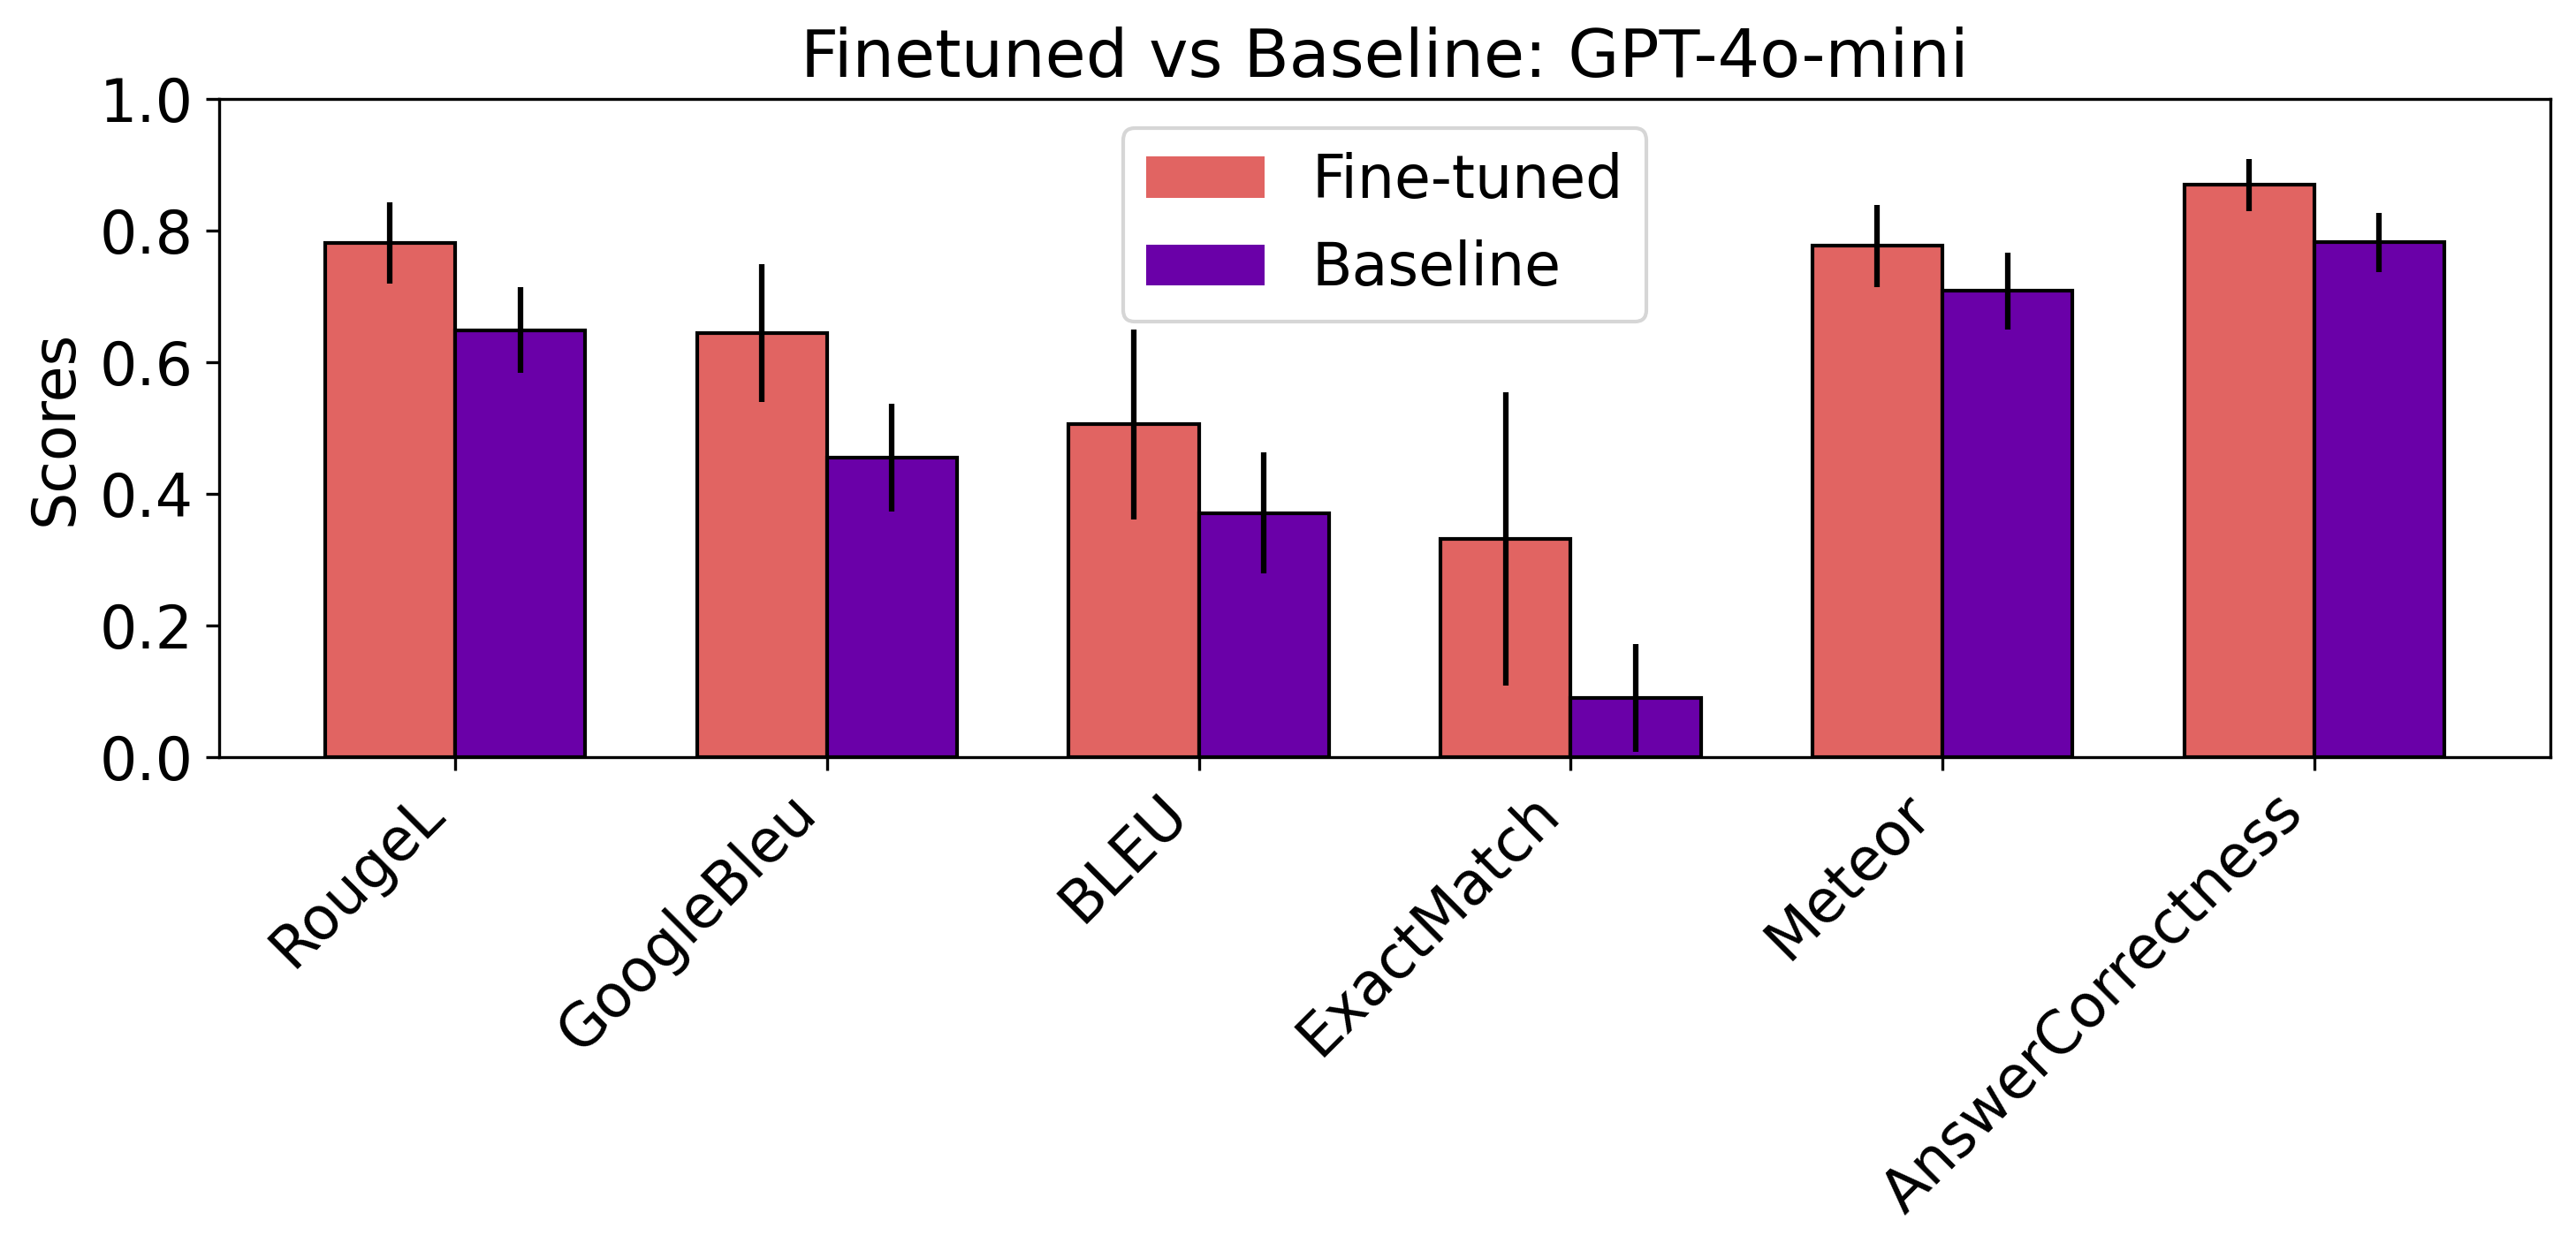

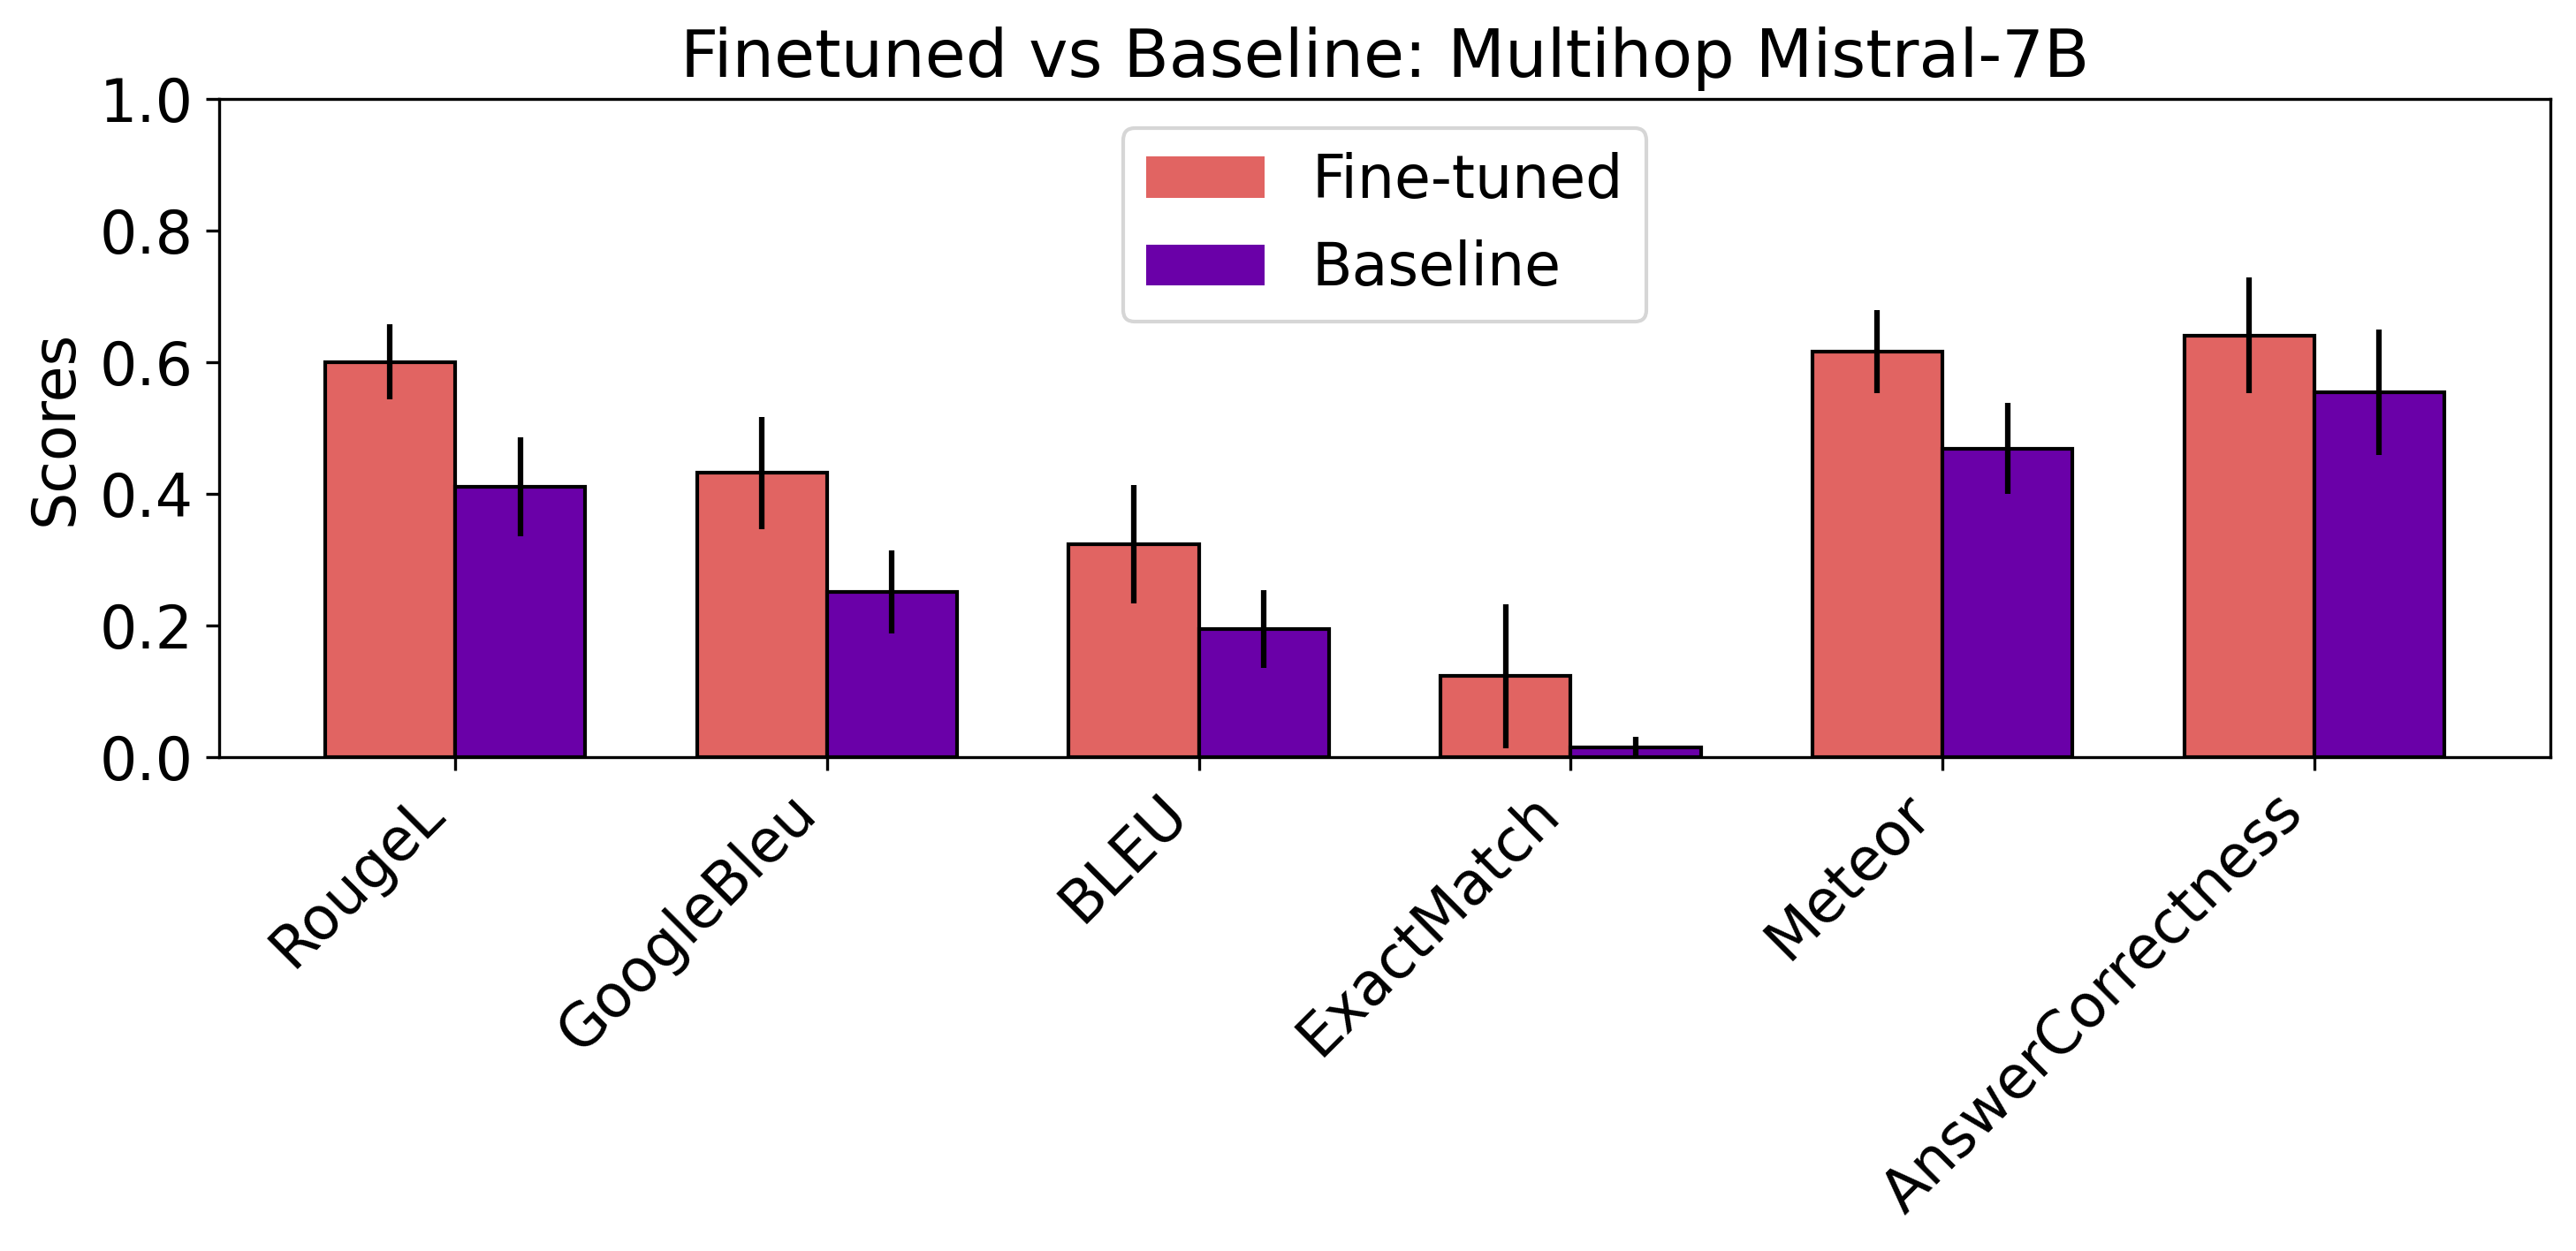

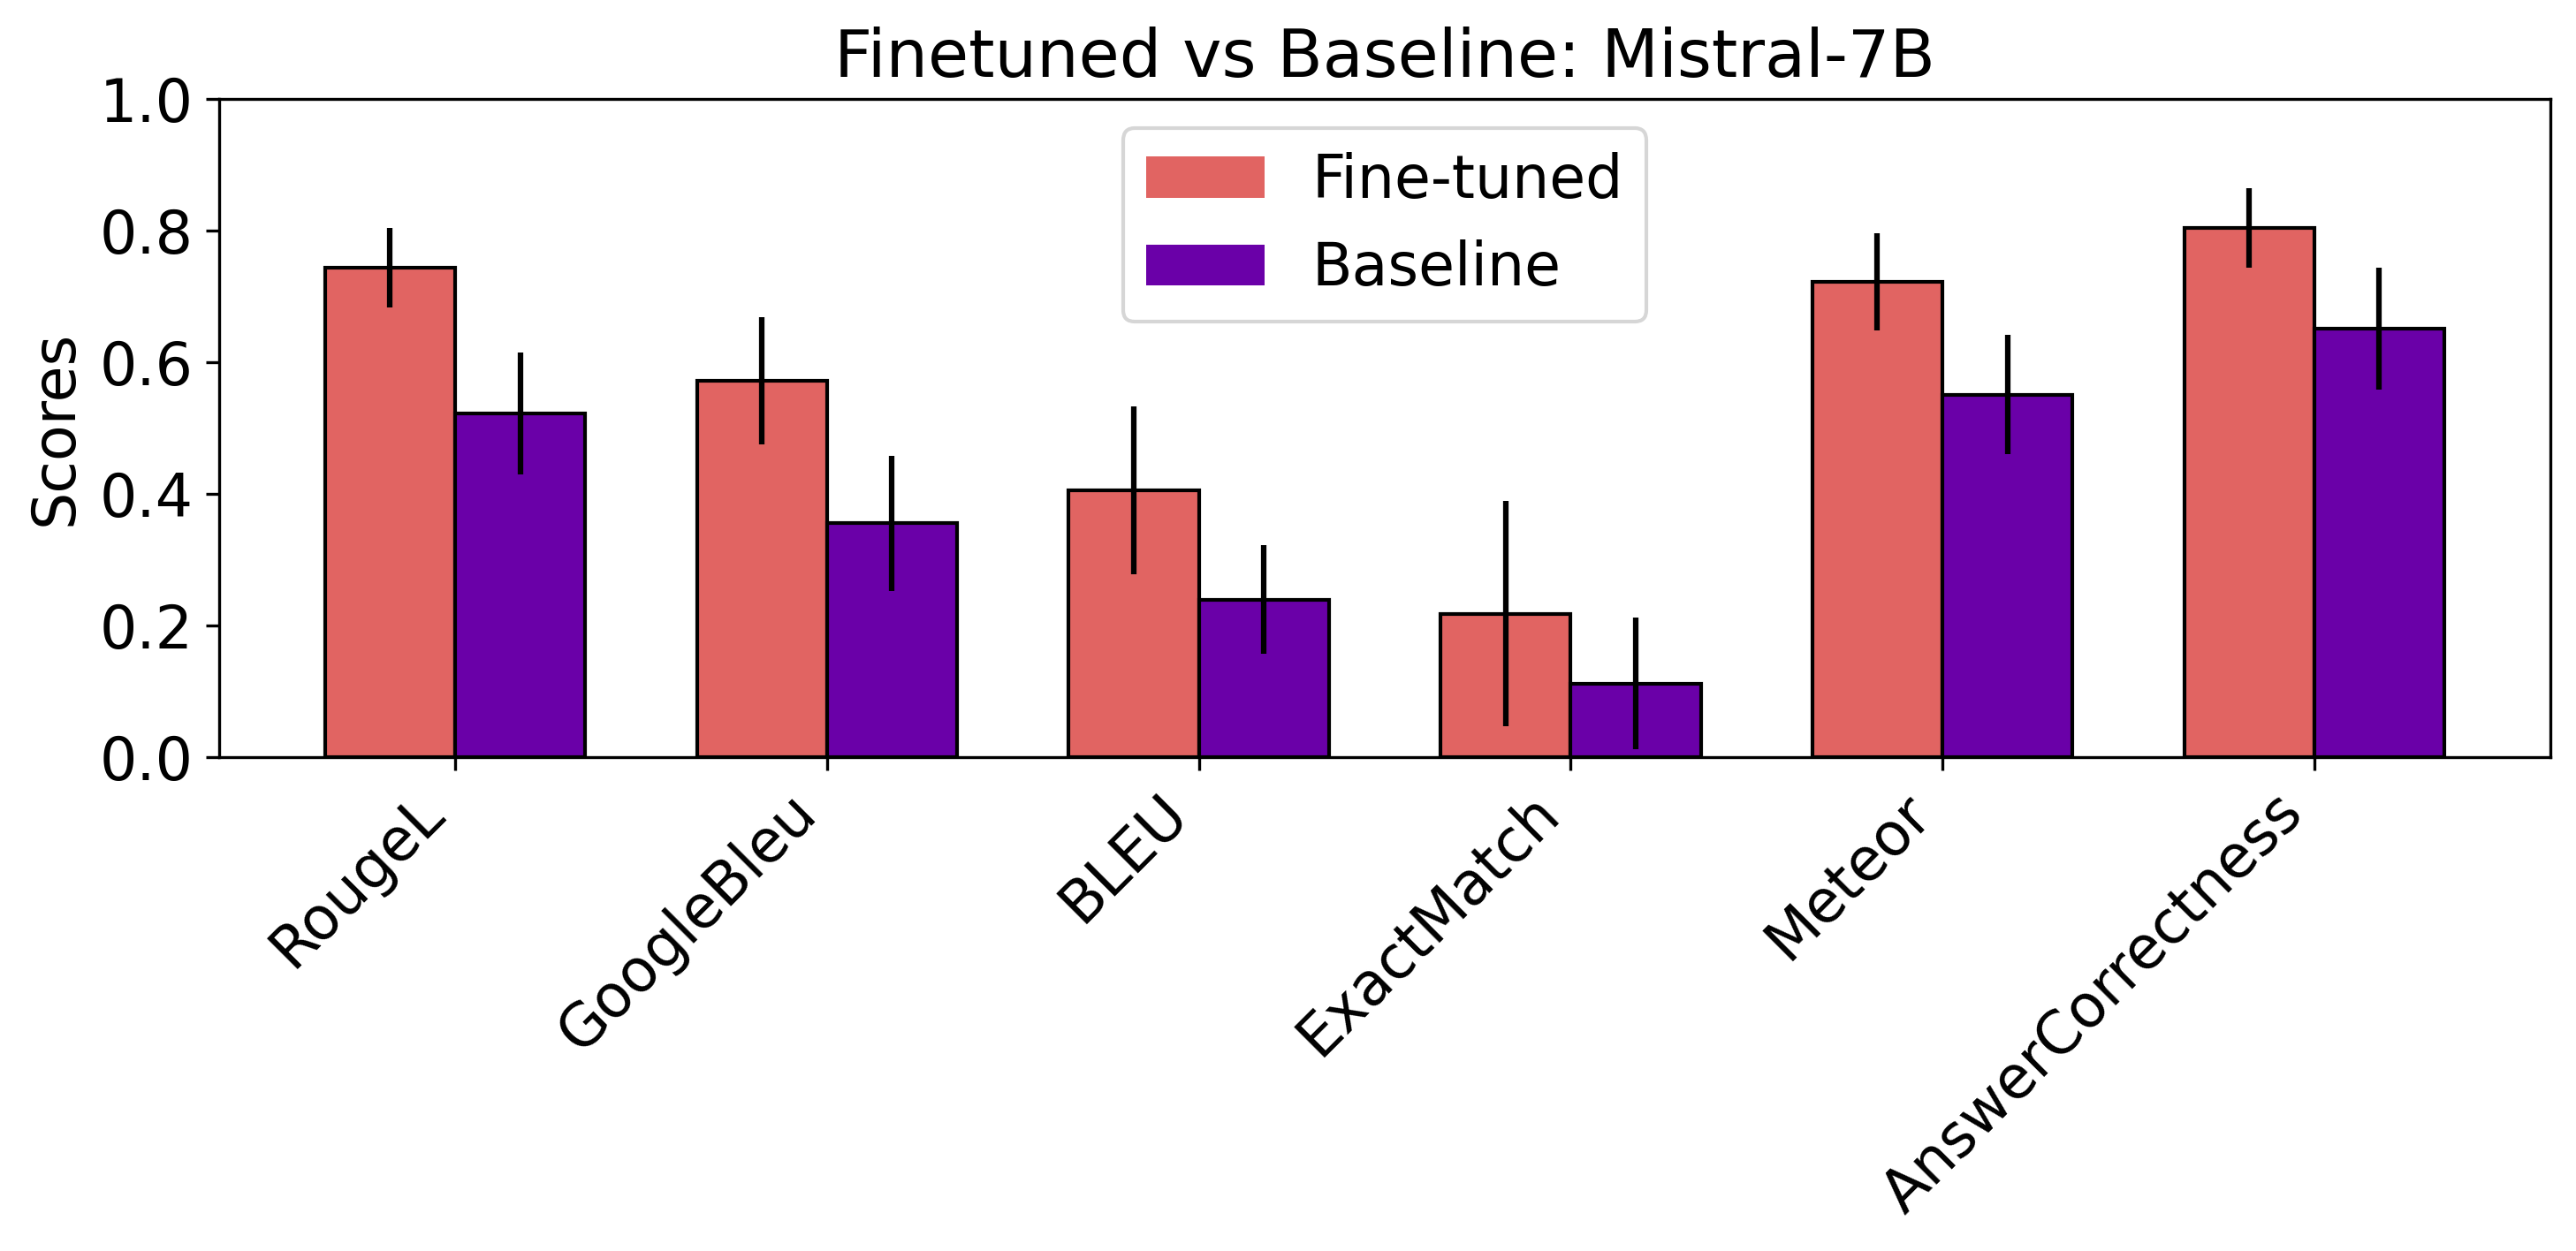

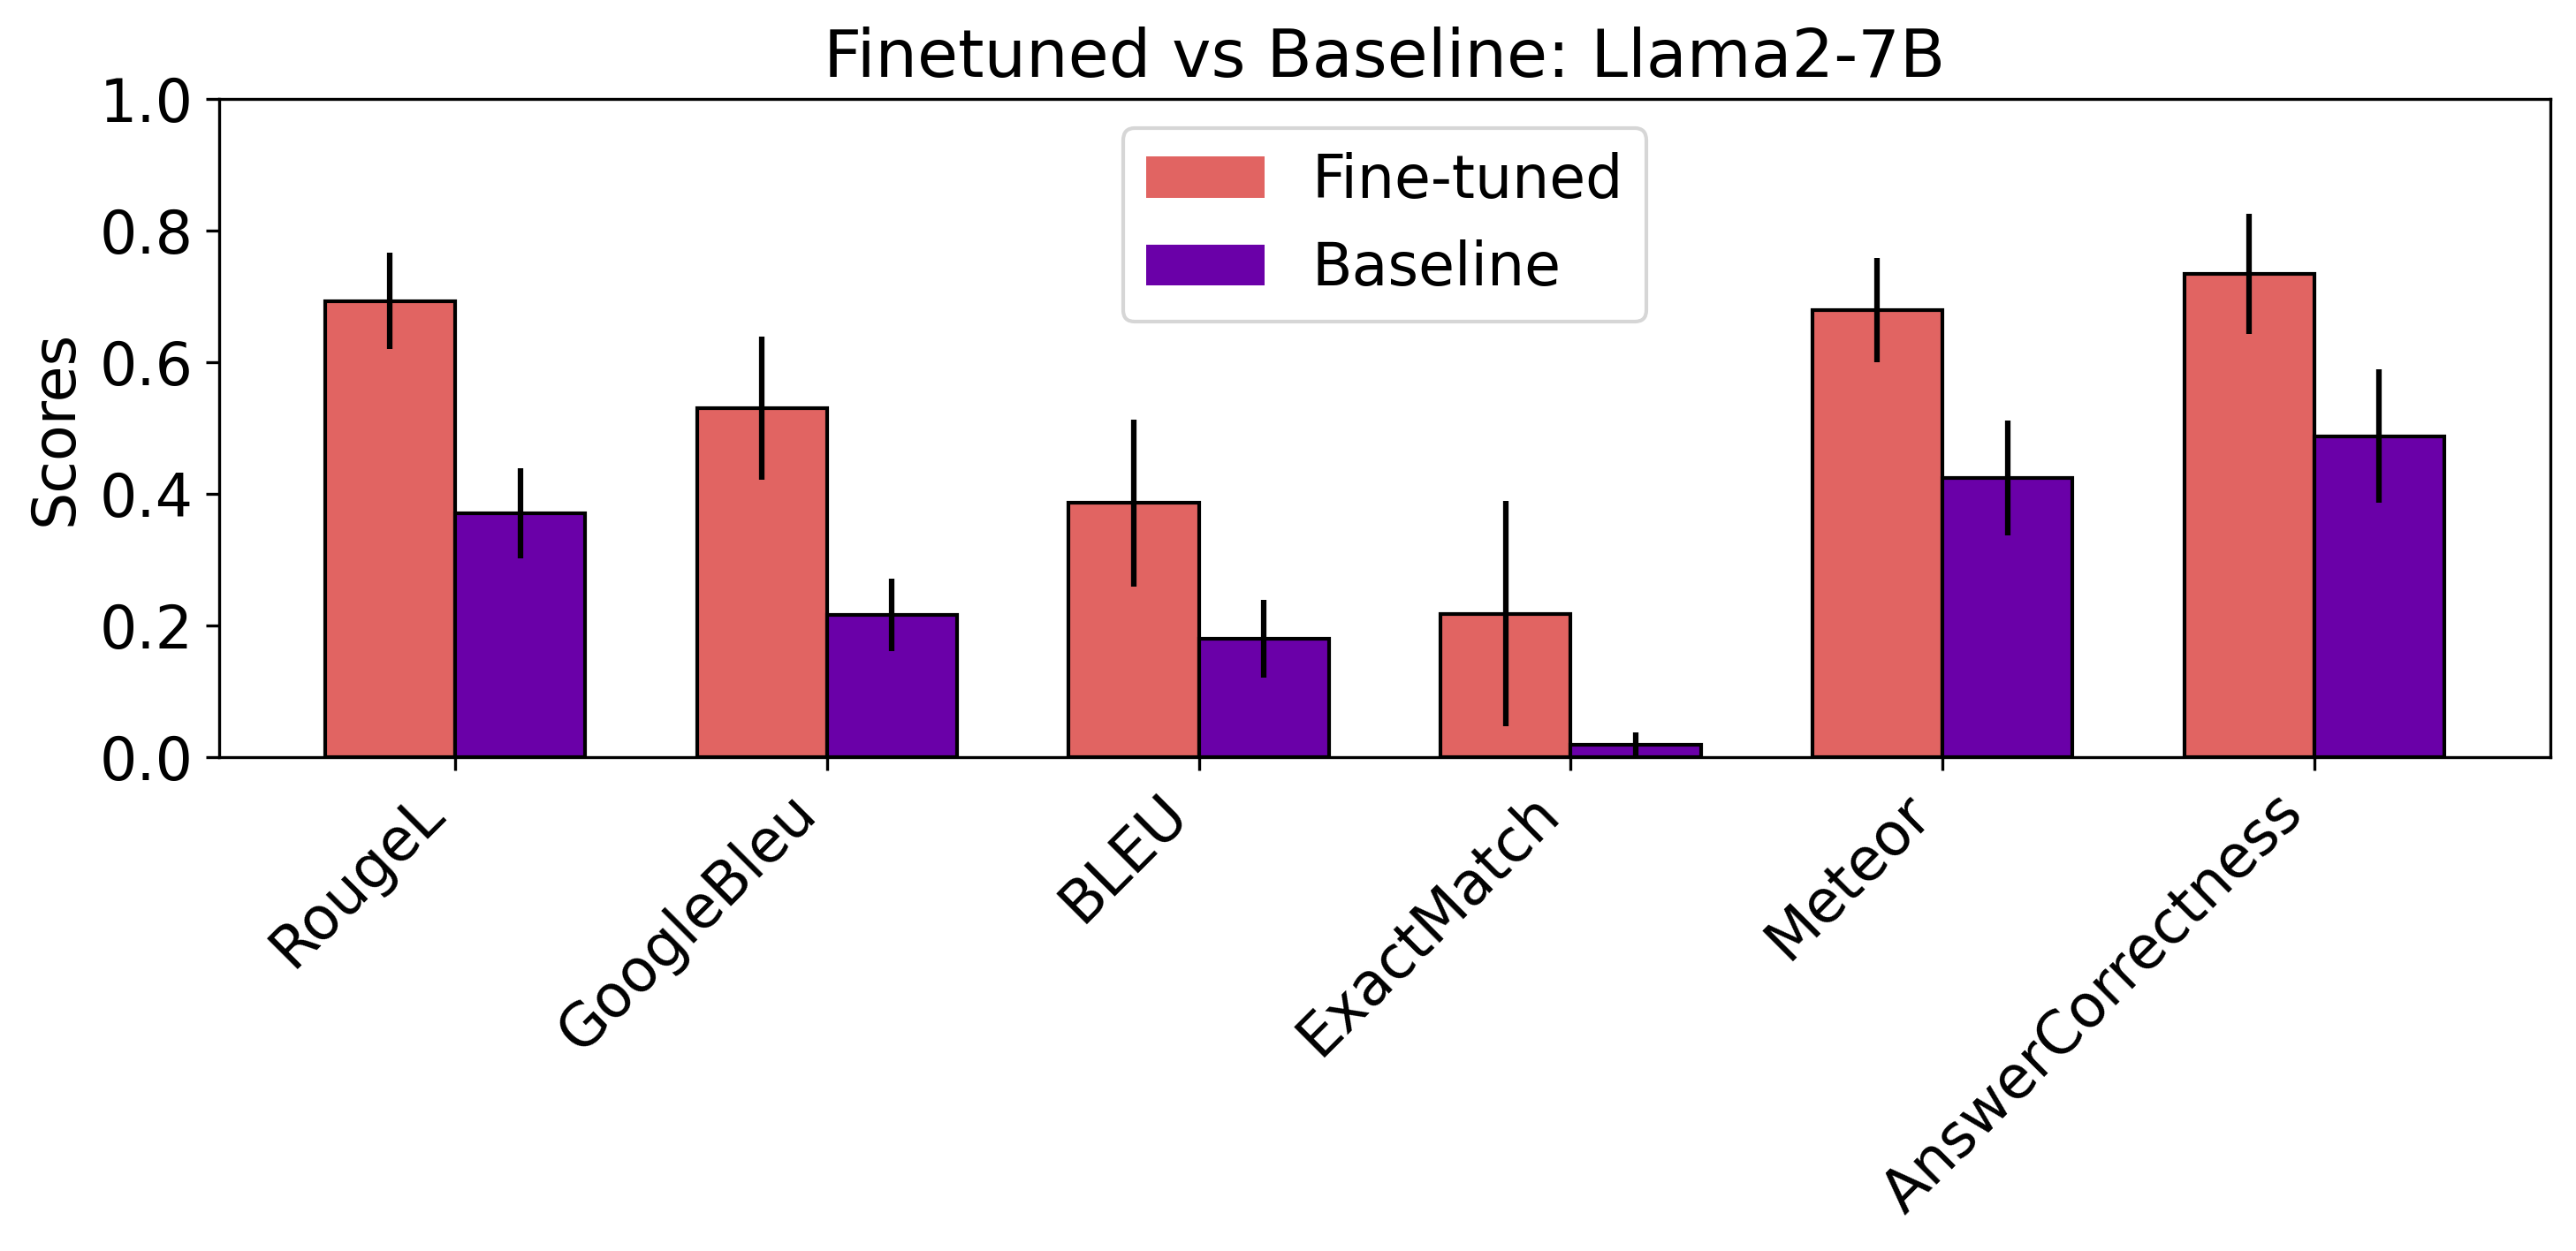

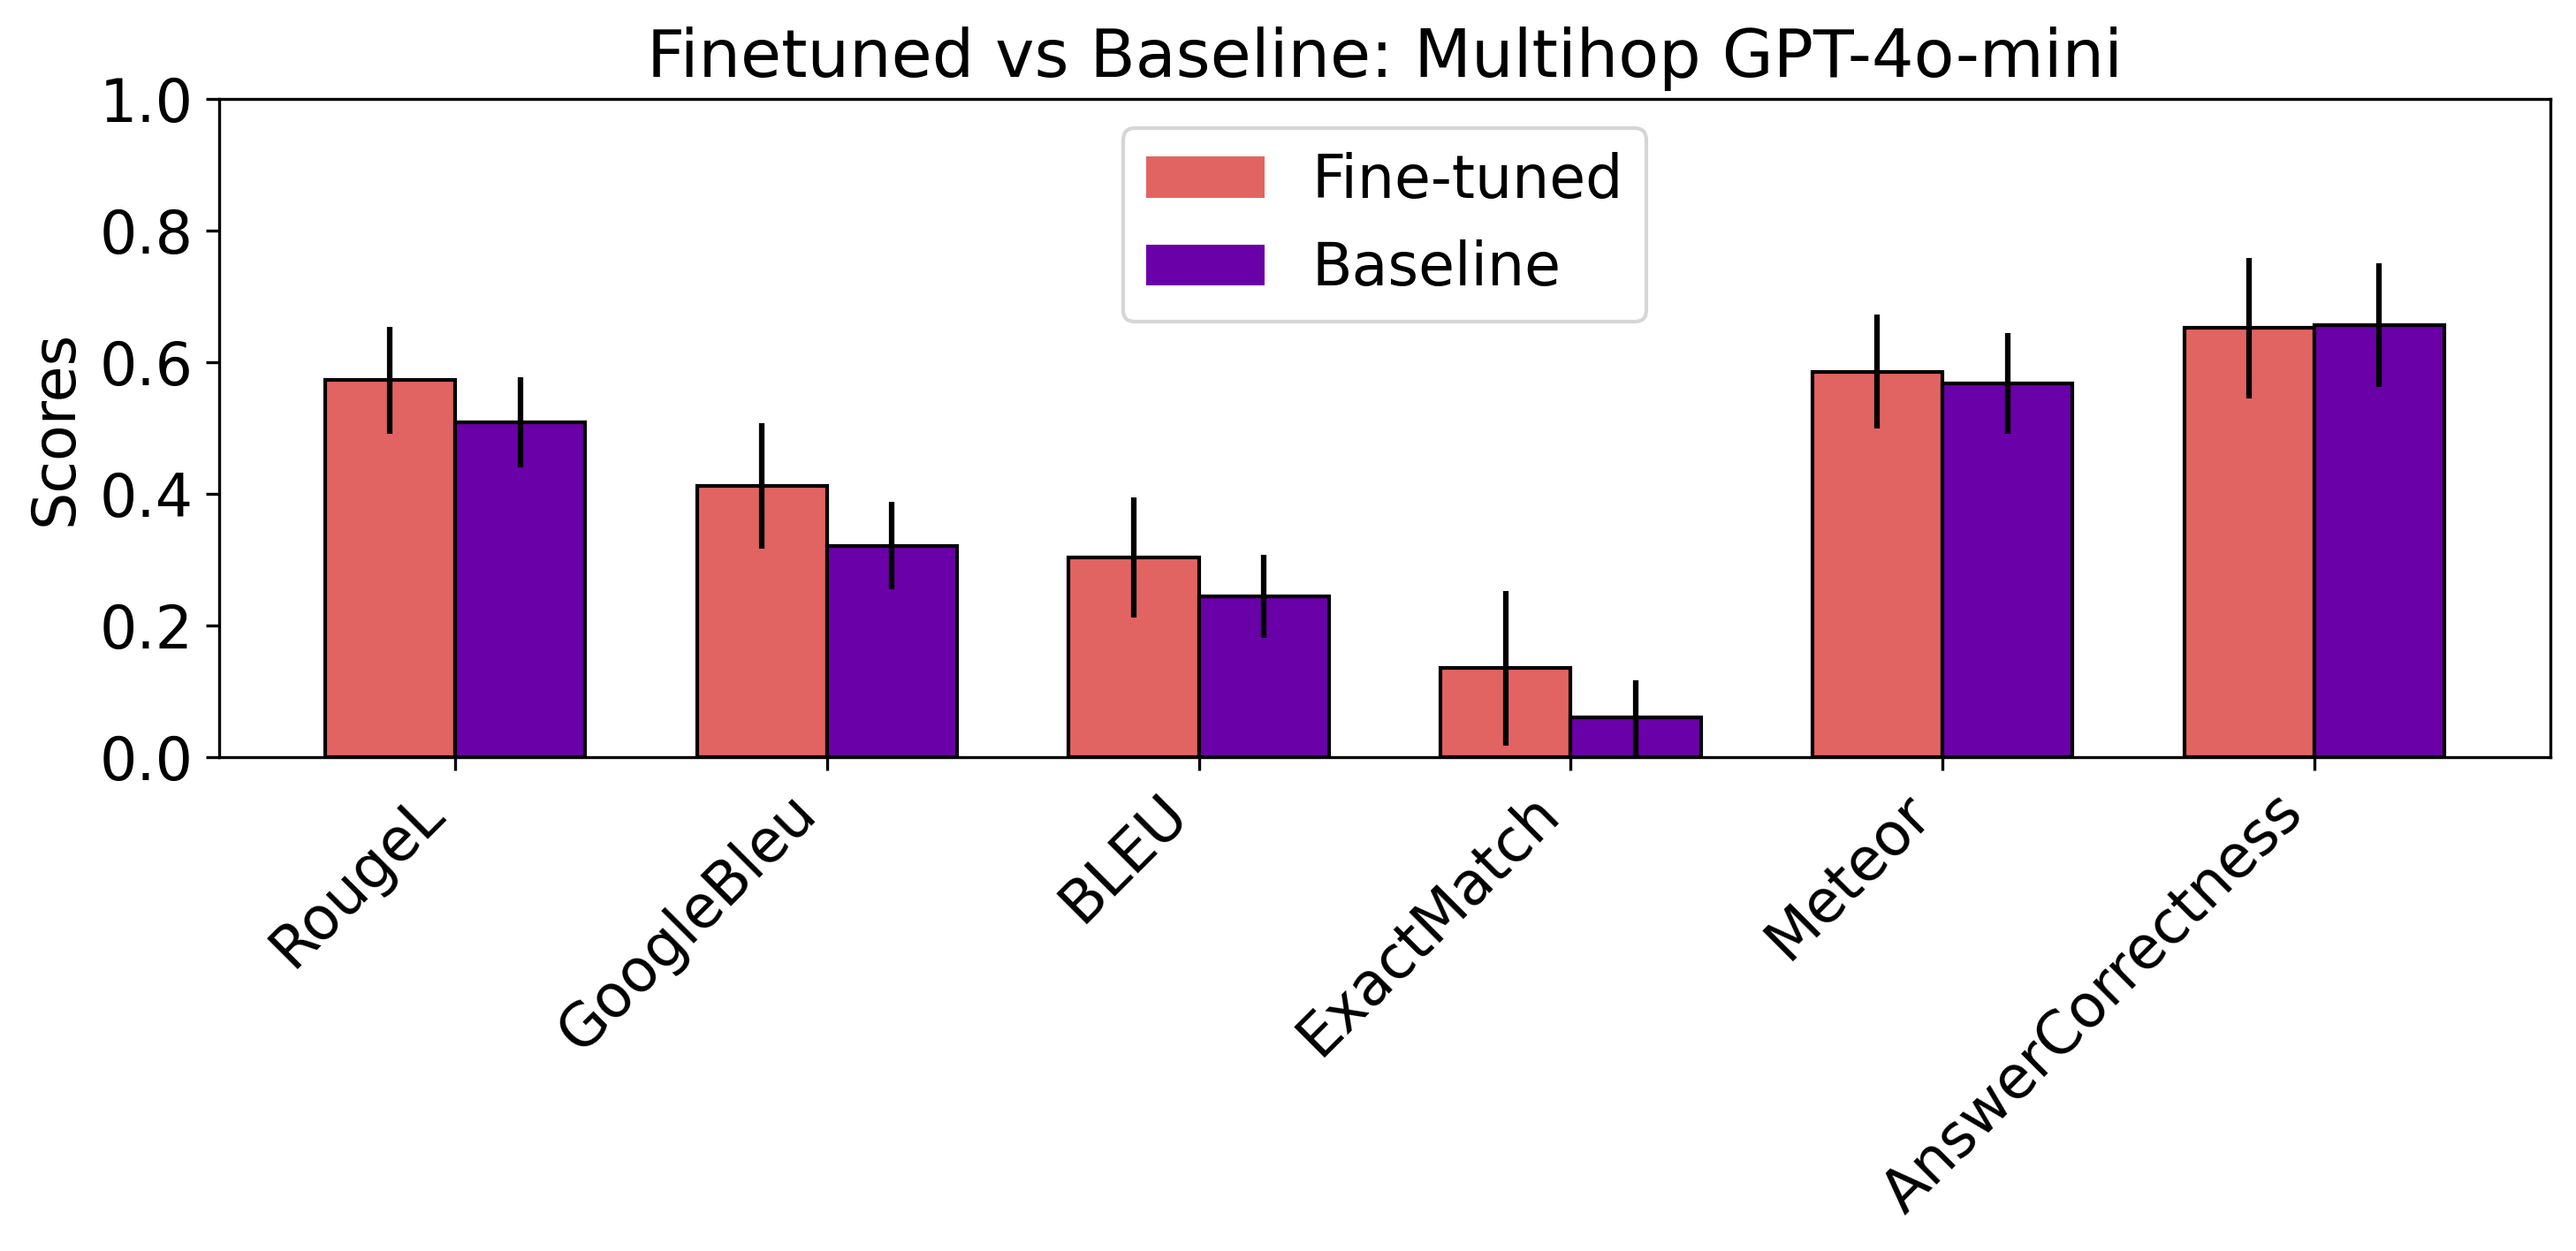

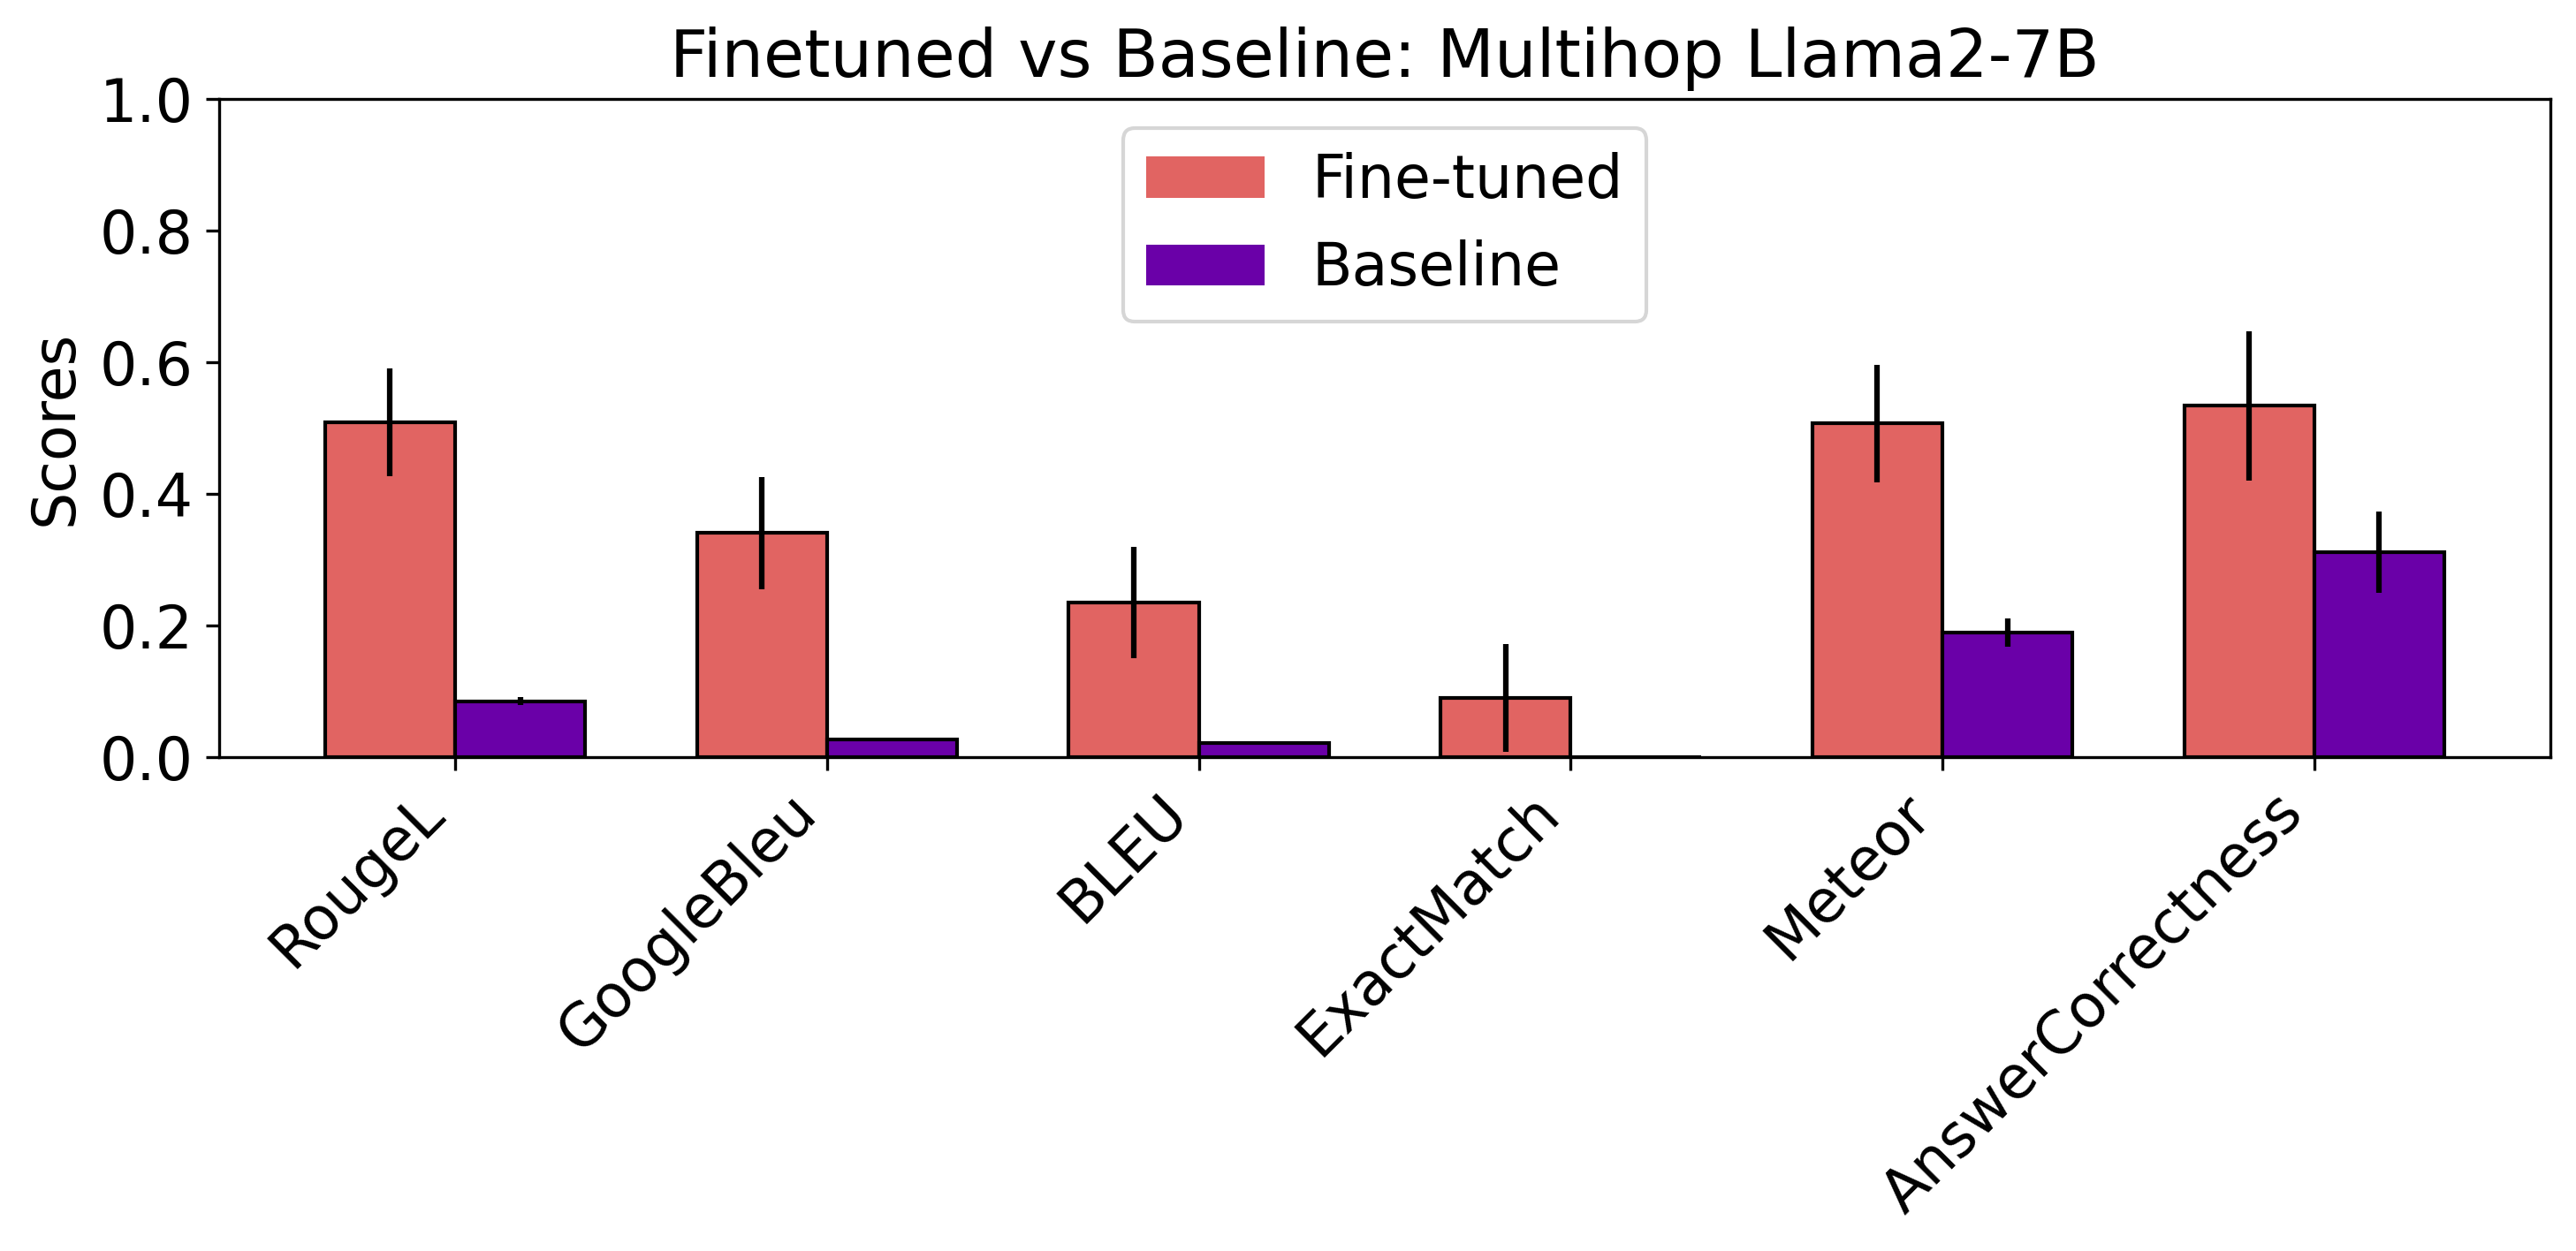

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Metrics: ['RougeL', 'GoogleBleu', 'BLEU', 'ExactMatch', 'Meteor', 'AnswerCorrectness']
metrics = ['RougeL', 'GoogleBleu', 'BLEU', 'ExactMatch', 'Meteor', 'AnswerCorrectness']

# Create list ft_metrics by prepending 'FT_' to Metrics
ft_metrics = ['FT_' + metric for metric in metrics]

# Create list nft_metrics by prepending 'NFT_' to Metrics
nft_metrics = ['NFT_' + metric for metric in metrics]

# Iterate through all .csv files under the same directory
for file in os.listdir('.'):
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        
        # Extract columns corresponding to all ft and nft metrics
        ft_data = df[ft_metrics]
        nft_data = df[nft_metrics]
        
        # Calculate mean and variance for each
        ft_mean = ft_data.mean()
        ft_var = ft_data.var()
        nft_mean = nft_data.mean()
        nft_var = nft_data.var()
        
        # Group ft and nft values corresponding to the same metric
        metrics_means = pd.DataFrame({
            'FT': ft_mean.values,
            'NFT': nft_mean.values
        }, index=metrics)
        
        metrics_vars = pd.DataFrame({
            'FT': ft_var.values,
            'NFT': nft_var.values
        }, index=metrics)
        
        # Plot grouped bar plot with xtick labels as Metrics
        fig, ax = plt.subplots(figsize=(10, 5))
        
        x = np.arange(len(metrics))  # the label locations
        width = 0.35  # the width of the bars
        
        rects1 = ax.bar(x - width/2, metrics_means['FT'], width, label='Fine-tuned', yerr=metrics_vars['FT'], capsize=0, color=plt.get_cmap('plasma')(0.6))
        rects2 = ax.bar(x + width/2, metrics_means['NFT'], width, label='Baseline', yerr=metrics_vars['NFT'], capsize=0, color=plt.get_cmap('plasma')(0.2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Scores')
        ax.set_ylim(ymin=0, ymax=1.0)
        
        # Extract the base filename without '_eval.csv'
        base_filename = file.replace('_eval.csv', '')

        # replace 'gpt' with 'GPT' in base_filename, otherwise capitalize filename
        base_filename = base_filename.capitalize().replace('_', ' ').replace('gpt', 'GPT').replace('Gpt', 'GPT').replace('Mistral', 'Mistral-7B').replace('mistral', 'Mistral-7B').replace('7b', '7B').replace('llama', 'Llama')

        # Use the base filename in the title
        ax.set_title(f'Finetuned vs Baseline: {base_filename}')

        ax.set_xticks(x)
        ax.set_xticklabels(metrics, rotation = 45, ha='right')
        ax.legend(loc='upper center')
        
        # Adjust plot to show hatch patterns clearly
        plt.setp(rects1, edgecolor='black')
        plt.setp(rects2, edgecolor='black')
        
        fig.tight_layout()

        plt.savefig(f'figures/{base_filename}_comparison_results.png')
        
        plt.show()
